## Supervised Learning - Classification Models ##

Steps:

1. Import important libraraies.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

2. Split the dataset into training (80%) and testing (20%) sets.

In [8]:
df = pd.read_csv("../data/heart_disease.csv")

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Train the following models:

- Logistic Regression

--- Logistic Regression (Binary) ---
Accuracy : 0.885
Precision: 0.862
Recall   : 0.893
F1-score : 0.877
AUC Score: 0.961


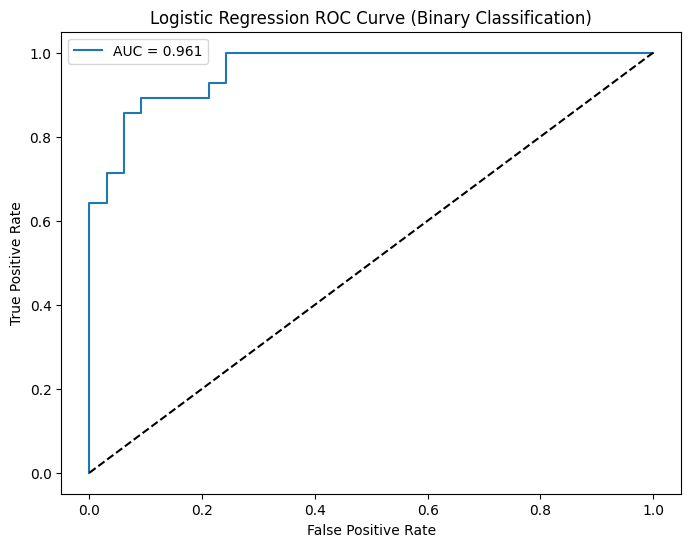

In [9]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("--- Logistic Regression (Binary) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve (Binary Classification)")
plt.legend()
plt.show()


- Decision Tree

--- Decision Tree (Binary) ---
Accuracy : 0.754
Precision: 0.697
Recall   : 0.821
F1-score : 0.754
AUC Score: 0.759


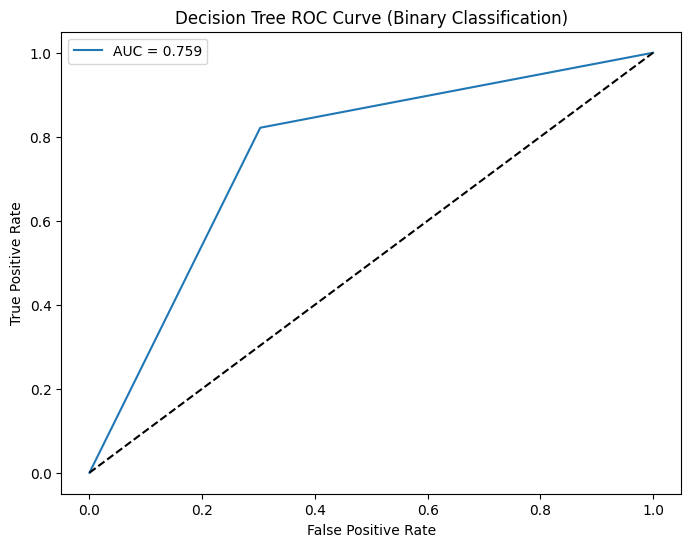

In [10]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("--- Decision Tree (Binary) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve (Binary Classification)")
plt.legend()
plt.show()

- Random Forest

--- Random Forest (Binary) ---
Accuracy : 0.869
Precision: 0.833
Recall   : 0.893
F1-score : 0.862
AUC Score: 0.930


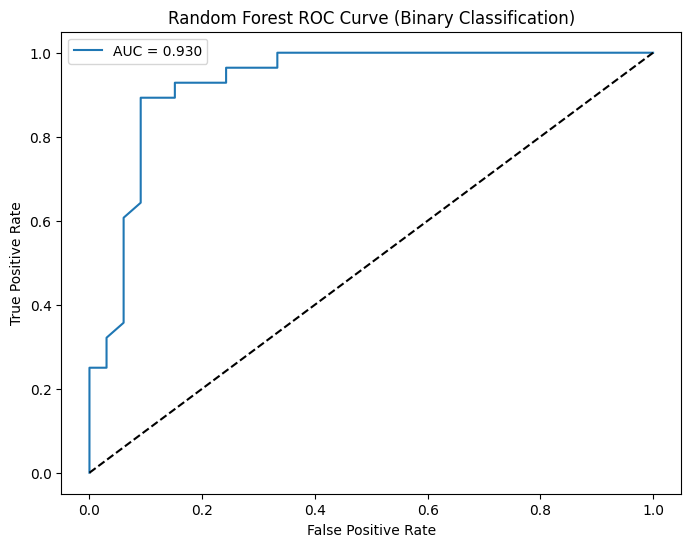

In [11]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("--- Random Forest (Binary) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (Binary Classification)")
plt.legend()
plt.show()

- Support Vector Machine (SVM)

--- SVM (Binary) ---
Accuracy : 0.885
Precision: 0.889
Recall   : 0.857
F1-score : 0.873
AUC Score: 0.961


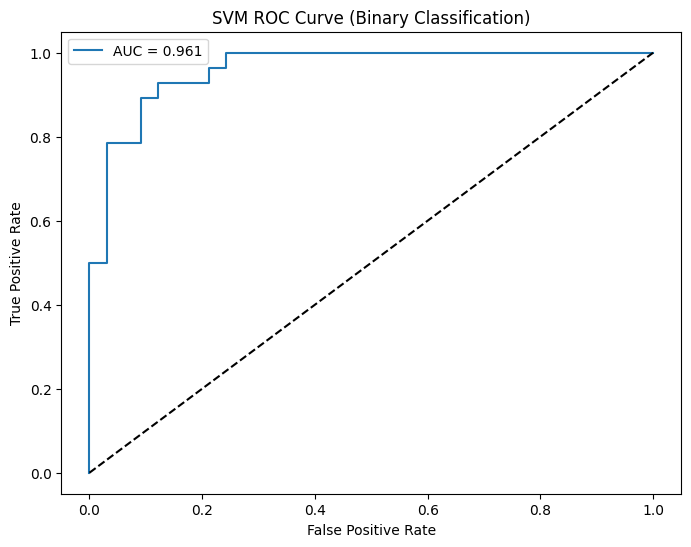

In [12]:
for col in ['cp_4', 'thal_7', 'exang']:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("--- SVM (Binary) ---")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"AUC Score: {auc_score:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (Binary Classification)")
plt.legend()
plt.show()